<a href="https://colab.research.google.com/github/arkadev658/Image-identification/blob/main/svm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**classification using Support Vector Machine**

In [ ]:
#data preprocessing for training set
#reinforcement
from PIL import Image
import numpy as np
binimg=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,125):
    try:
        im = Image.open(f'C:\\Users\\HP\\Desktop\\python\\combined_data\\rebar\\{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [ ]:
len(binimg)

97

In [ ]:
#data normalization
binimg=np.array(binimg)
binimg_scaled=[]
for img in binimg:
    img=img/255.0
    binimg_scaled.append(img)
binimg_scaled=np.array(binimg_scaled)

(97, 200, 200)


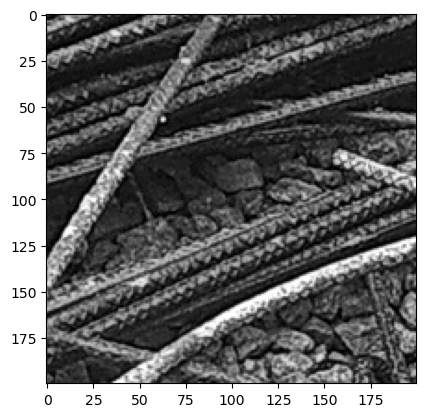

In [ ]:
import matplotlib.pyplot as plt
i=np.random.randint(0,99)
plt.imshow(binimg_scaled[i],cmap='gray')
print(binimg_scaled.shape)

In [ ]:
#training set formation
import numpy as np
Y=np.ones(binimg_scaled.shape[0])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(binimg_scaled,Y,train_size=0.75)
X_train=X_train.reshape(X_train.shape[0],(X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(72, 40000)
(72,)
(25, 40000)
(25,)


In [ ]:
#data preprocessing for training set
#debris
from PIL import Image
import numpy as np
binimg1=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,238):
    try:
        im = Image.open(f'C:\\Users\\HP\\Desktop\\python\\combined_data\\debris\\{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg1.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [ ]:
binimg1[0].shape

(200, 200)

In [ ]:
#data normalization
binimg1=np.array(binimg1)
binimg_scaled1=[]
for img in binimg1:
    img=img/255.0
    binimg_scaled1.append(img)
binimg_scaled1=np.array(binimg_scaled1)

In [ ]:
binimg_scaled1.shape

(103, 200, 200)

In [ ]:
#training set formation
import numpy as np
Y1=np.zeros(binimg_scaled1.shape[0])
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(binimg_scaled1,Y1,train_size=0.7)
X_train1=X_train1.reshape(X_train1.shape[0],(X_train1.shape[1]*X_train1.shape[2]))
X_test1=X_test1.reshape(X_test1.shape[0],(X_test1.shape[1]*X_test1.shape[2]))
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)


(72, 40000)
(72,)
(31, 40000)
(31,)


In [ ]:
#data concatination and shuffling
X_train_f=np.concatenate((X_train,X_train1))
Y_train_f=np.concatenate((Y_train,Y_train1))
X_test_f=np.concatenate((X_test,X_test1))
Y_test_f=np.concatenate((Y_test,Y_test1))
from sklearn.utils import shuffle
X_train_f,Y_train_f=shuffle(X_train_f,Y_train_f,random_state=0)
X_test_f,Y_test_f=shuffle(X_test_f,Y_test_f,random_state=0)

In [ ]:
X_test_f.shape

(56, 40000)

In [ ]:
Y_test_f.shape

(56,)

In [ ]:
#model (random forrest)
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=200)
model1.fit(X_train_f,Y_train_f)

RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100,200],
              'max_depth': [None, 5, 10],}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(random_state=0)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_f, Y_train_f)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'n_estimators': 200}
Best score:  0.7849753694581281


In [ ]:
import pandas as pd
df1=pd.DataFrame(grid_search.cv_results_)
df1[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,50,0.756897
1,100,0.736207
2,200,0.777833
3,50,0.770936
4,100,0.743103
5,200,0.784975
6,50,0.756897
7,100,0.736207
8,200,0.777833


In [ ]:
df1.sort_values(by='rank_test_score',ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,2.541695,0.118792,0.047787,0.009094,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.724138,0.827586,0.793103,0.758621,0.821429,0.784975,0.039003,1
2,2.568654,0.217240,0.058206,0.012819,None,200,"{'max_depth': None, 'n_estimators': 200}",0.724138,0.827586,0.793103,0.758621,0.785714,0.777833,0.034707,2
8,2.574542,0.122065,0.050507,0.008872,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.724138,0.827586,0.793103,0.758621,0.785714,0.777833,0.034707,2
3,0.637812,0.079637,0.020944,0.005884,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.689655,0.758621,0.793103,0.827586,0.785714,0.770936,0.046211,4
0,0.674470,0.069233,0.021832,0.003251,None,50,"{'max_depth': None, 'n_estimators': 50}",0.689655,0.758621,0.758621,0.827586,0.750000,0.756897,0.043754,5
6,0.656278,0.046988,0.020451,0.005245,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.689655,0.758621,0.758621,0.827586,0.750000,0.756897,0.043754,5
4,1.274004,0.065899,0.037898,0.011091,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.724138,0.724138,0.758621,0.758621,0.750000,0.743103,0.015802,7
1,1.421036,0.105479,0.042412,0.009327,None,100,"{'max_depth': None, 'n_estimators': 100}",0.724138,0.724138,0.724138,0.758621,0.750000,0.736207,0.015031,8
7,1.311897,0.132534,0.032795,0.015543,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.724138,0.724138,0.724138,0.758621,0.750000,0.736207,0.015031,8


In [ ]:
#model tools
from sklearn.svm import SVC

In [ ]:
model=SVC(C=10,kernel='rbf')
model.fit(X_train_f,Y_train_f)

SVC(C=10)

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='scale'),{'C':[0.1,1,10],'kernel':['rbf','linear','sigmoid','poly']},cv=5,return_train_score=False)
clf.fit(X_train_f,Y_train_f)
df=pd.DataFrame(clf.cv_results_)

In [ ]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,rbf,0.521921
1,0.1,linear,0.715025
2,0.1,sigmoid,0.471921
3,0.1,poly,0.735961
4,1,rbf,0.715517
5,1,linear,0.715025
6,1,sigmoid,0.471921
7,1,poly,0.729064
8,10,rbf,0.750246
9,10,linear,0.715025


In [ ]:
#prediction
y_predicted=model.predict(X_test_f)
print(f"accuracy of model is: {model.score(X_test_f,Y_test_f)}")

accuracy of model is: 0.6964285714285714


In [ ]:
X_test_f.shape

(56, 40000)

In [ ]:
#comparison with original data
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])
df_out

,original,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_out['original'],df_out['predicted']))

              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71        31
         1.0       0.64      0.72      0.68        25

    accuracy                           0.70        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.70      0.70      0.70        56



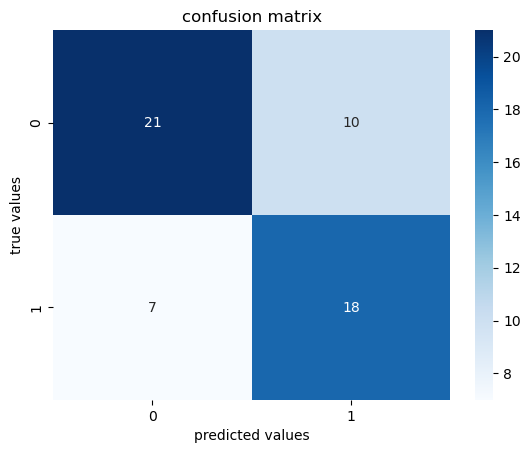

In [ ]:
#visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [ ]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(X_train_f,Y_train_f)

In [ ]:
y_predicted=model2.predict(X_test_f)
print(f"accuracy of model is: {model2.score(X_test_f,Y_test_f)}")

In [ ]:
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [ ]:

im = Image.open('C:\\Users\\HP\\Desktop\\4.png')
im=im.resize((200,200))
im = np.array(im)
new_im=np.array(Image.fromarray(im))/255.0

In [ ]:
new_im.shape
x_test=new_im.reshape(1,-1)

In [ ]:
x_test.shape

In [ ]:
model2.predict(x_test)